### Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import json



### Load The Dataset

In [ ]:
df = pd.read_csv('/content/final_data.csv', index_col=['Datetime'], parse_dates=True)
df.head()

,Traffic flow,Vehicle count,Road name
Datetime,,,
2024-09-23 16:36:00,mid,10,King Fahad Road
2024-09-23 16:37:00,mid,10,King Fahad Road
2024-09-23 16:38:00,mid,10,King Fahad Road
2024-09-23 16:39:00,light,9,King Fahad Road
2024-09-23 16:40:00,light,9,King Fahad Road


### Feature Engineering

In [ ]:
df['Traffic Density'] = df['Vehicle count'] / 60 # which is the road length that we calculate it from google maps
df

,Traffic flow,Vehicle count,Road name,Traffic Density
Datetime,,,,
2024-09-23 16:36:00,mid,10,King Fahad Road,0.166667
2024-09-23 16:37:00,mid,10,King Fahad Road,0.166667
2024-09-23 16:38:00,mid,10,King Fahad Road,0.166667
2024-09-23 16:39:00,light,9,King Fahad Road,0.150000
2024-09-23 16:40:00,light,9,King Fahad Road,0.150000
...,...,...,...,...
2024-09-23 23:55:00,light,6,King Fahad Road,0.100000
2024-09-23 23:56:00,light,4,King Fahad Road,0.066667
2024-09-23 23:57:00,light,7,King Fahad Road,0.116667


In [ ]:
df.to_csv('final_dataset.csv', index=False)

####Sort the values

In [ ]:
df.sort_values(by='Datetime', inplace=True)
df

,Traffic flow,Vehicle count,Road name,Traffic Density
Datetime,,,,
2024-08-23 06:00:00,heavy,36,King Fahad Road,0.600000
2024-08-23 06:01:00,heavy,32,King Fahad Road,0.533333
2024-08-23 06:02:00,heavy,47,King Fahad Road,0.783333
2024-08-23 06:03:00,heavy,43,King Fahad Road,0.716667
2024-08-23 06:04:00,heavy,41,King Fahad Road,0.683333
...,...,...,...,...
2024-09-25 21:56:51,light,4,King Fahad Road,0.066667
2024-09-25 21:57:51,light,3,King Fahad Road,0.050000
2024-09-25 21:58:51,light,2,King Fahad Road,0.033333


## Exploratory Data Analysis (EDA)




Inspect the dataset

Dataset structure

Summary statistics

Check for missing values

Distribution of features

Categorical feature analysis

Correlation matrix

Outlier detection

---


In [ ]:
df.shape

(46145, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46145 entries, 2024-08-23 06:00:00 to 2024-09-25 22:00:51
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Traffic flow     46145 non-null  object 
 1   Vehicle count    46145 non-null  int64  
 2   Road name        46145 non-null  object 
 3   Traffic Density  46145 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
df.sample(100)

,Traffic flow,Vehicle count,Road name,Traffic Density
Datetime,,,,
2024-08-26 17:54:00,heavy,27,King Fahad Road,0.450000
2024-09-05 00:21:00,light,4,King Fahad Road,0.066667
2024-08-30 06:19:00,heavy,30,King Fahad Road,0.500000
2024-09-06 07:16:00,heavy,35,King Fahad Road,0.583333
2024-08-28 11:37:00,mid,17,King Fahad Road,0.283333
...,...,...,...,...
2024-08-25 01:11:00,light,3,King Fahad Road,0.050000
2024-09-06 18:36:00,light,6,King Fahad Road,0.100000
2024-09-04 07:22:00,heavy,48,King Fahad Road,0.800000


In [ ]:
df.dtypes

,0
Traffic flow,object
Vehicle count,int64
Road name,object
Traffic Density,float64


In [ ]:
df.describe()

,Vehicle count,Traffic Density
count,46145.000000,46145.000000
mean,17.381103,0.289685
std,13.718334,0.228639
min,1.000000,0.016667
25%,6.000000,0.100000
50%,11.000000,0.183333
75%,27.000000,0.450000
max,49.000000,0.816667


In [ ]:
df.describe(include=['object'])

,Traffic flow,Road name
count,46145,46145
unique,3,1
top,light,King Fahad Road
freq,21578,46145


In [ ]:
df.isnull().sum()

,0
Traffic flow,0
Vehicle count,0
Road name,0
Traffic Density,0


### Data Visualization

array([[<Axes: title={'center': 'Vehicle count'}>,
        <Axes: title={'center': 'Traffic Density'}>, <Axes: >]],
      dtype=object)

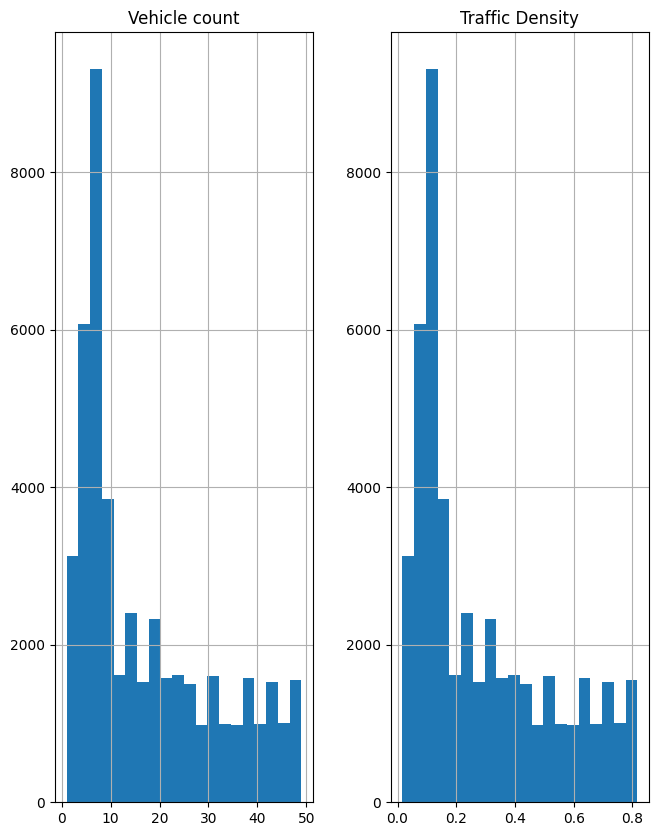

In [ ]:
# Histograms for numeric features
df.hist(bins=20, figsize=(12, 10), layout=(len(df.columns)//3, 3))

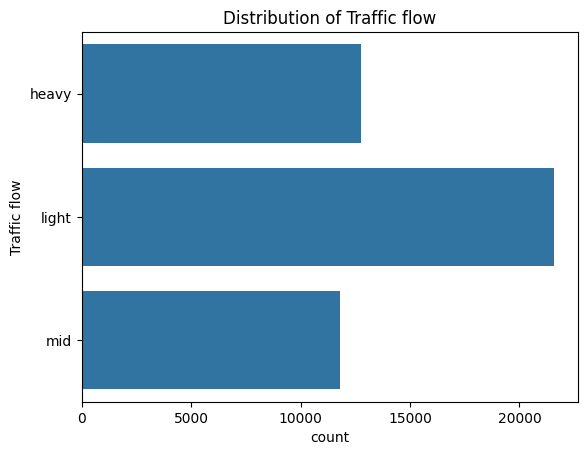

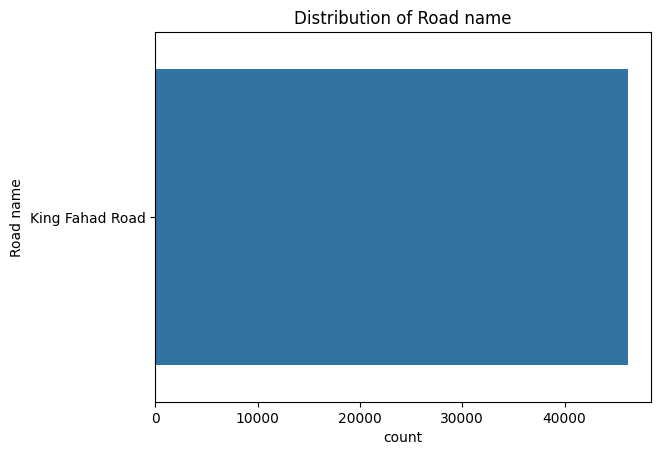

In [ ]:
# Bar plot for categorical columns
import seaborn as sns
for col in df.select_dtypes(include=['object']).columns:
    sns.countplot(y=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

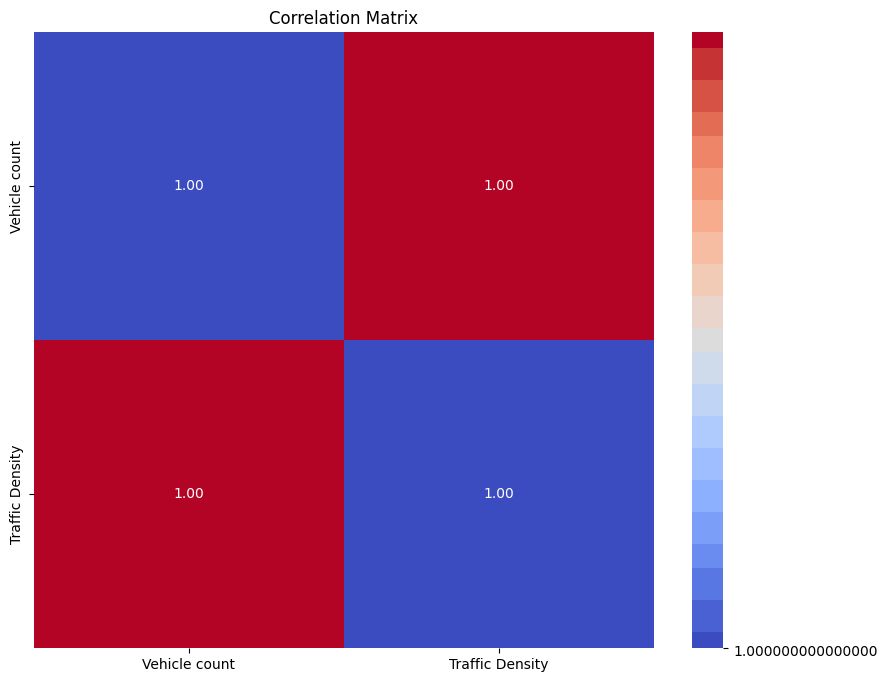

In [ ]:
# Heatmap
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

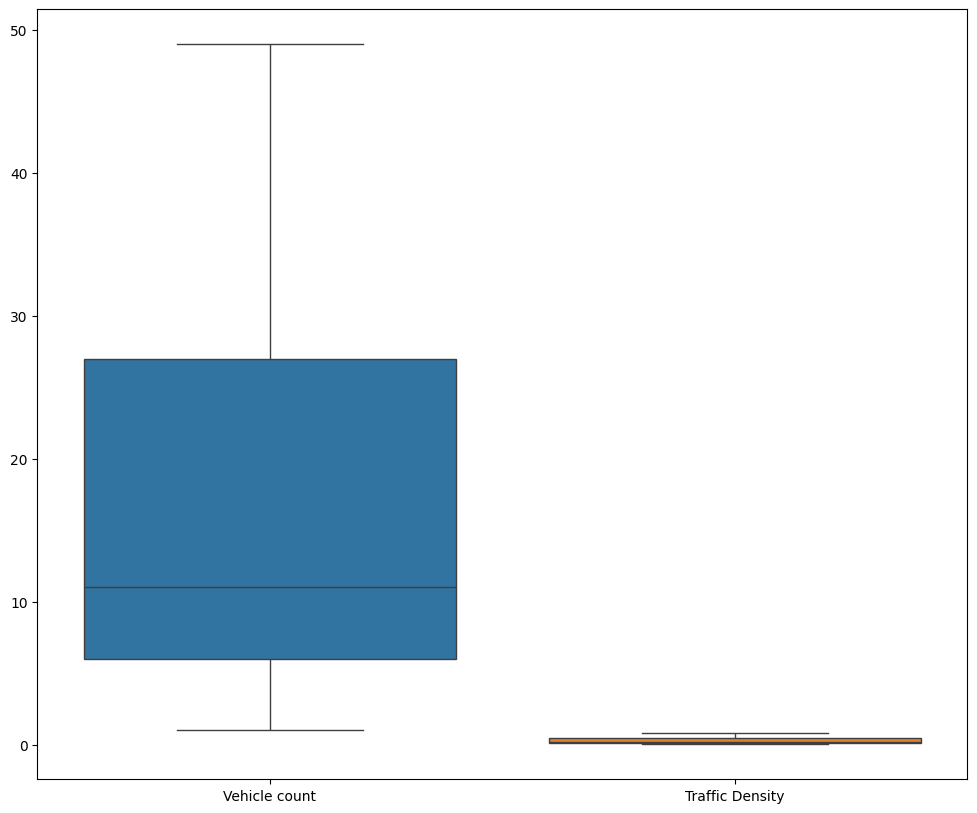

In [ ]:
# detect outlires
plt.figure(figsize=(12, 10))
sns.boxplot(data=df)

plt.show()

In [ ]:
# function to handle outlires

def handle_outliers(df):

    numeric_cols = df.select_dtypes(include=['float64', 'int64'])


    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1

    # Filter out rows with outlires
    is_outlier = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))


    df.drop(df[is_outlier.any(axis=1)].index, inplace=True)


handle_outliers(df)

In [ ]:
df

,Traffic flow,Vehicle count,Road name,Traffic Density
Datetime,,,,
2024-08-23 06:00:00,heavy,36,King Fahad Road,0.600000
2024-08-23 06:01:00,heavy,32,King Fahad Road,0.533333
2024-08-23 06:02:00,heavy,47,King Fahad Road,0.783333
2024-08-23 06:03:00,heavy,43,King Fahad Road,0.716667
2024-08-23 06:04:00,heavy,41,King Fahad Road,0.683333
...,...,...,...,...
2024-09-25 21:56:51,light,4,King Fahad Road,0.066667
2024-09-25 21:57:51,light,3,King Fahad Road,0.050000
2024-09-25 21:58:51,light,2,King Fahad Road,0.033333


In [ ]:
df['Traffic Density'].dtype

dtype('float64')

In [ ]:
# Drop the unnecessary columns for simplicity
df.drop(columns=['Vehicle count', 'Traffic flow','Road name'], inplace=True)

In [ ]:
df

,Traffic Density
Datetime,
2024-08-23 06:00:00,0.600000
2024-08-23 06:01:00,0.533333
2024-08-23 06:02:00,0.783333
2024-08-23 06:03:00,0.716667
2024-08-23 06:04:00,0.683333
...,...
2024-09-25 21:56:51,0.066667
2024-09-25 21:57:51,0.050000
2024-09-25 21:58:51,0.033333


#### Min-Max Scaler

In [ ]:
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(df)

scaled_df

array([[0.72916667],
       [0.64583333],
       [0.95833333],
       ...,
       [0.02083333],
       [0.02083333],
       [0.0625    ]])

### Data Spliting


In [ ]:
scaled_df = pd.DataFrame(scaled_df)

In [ ]:
train_len = int(len(scaled_df) * 0.7) # 70% for training
val_len = int(len(scaled_df) * 0.15) # 15% for validation

# Split the data
train = scaled_df.loc[:train_len]
val = scaled_df.loc[train_len:train_len + val_len]
test = scaled_df.loc[train_len + val_len:]

In [ ]:
train.shape, val.shape, test.shape

((32302, 1), (6922, 1), (6923, 1))

In [ ]:
from tensorflow.keras.utils import timeseries_dataset_from_array

window_size = 60 # take the first hour to predict the next hour

train_Xy = timeseries_dataset_from_array(train, targets=train[window_size:], sequence_length=window_size)
val_Xy = timeseries_dataset_from_array(val, targets=val[window_size:], sequence_length=window_size)
test_Xy = timeseries_dataset_from_array(test, targets=test[window_size:], sequence_length=window_size)


In [ ]:
X_test, y_test = next(iter(test_Xy))

## Time Series Models

### GRU Model

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Build Arch
GRU_model = Sequential([
                    Bidirectional(GRU(units=500, activation='tanh', return_sequences=True )), # 1st hidden layer

                    GRU(units=520, activation='tanh', return_sequences=True ), # 2nd hidden layer

                    GRU(units=520, activation='tanh', return_sequences=True ), # 2nd hidden layer

                    GRU(units=520, activation='tanh', return_sequences=True ), # 2nd hidden layer

                    GRU(units=520, activation='tanh'), # 3rd hidden layer

                    Dense(units=1, activation='linear')]) #output layer

# Compile -> set configration

optimizer = keras.optimizers.Adam(learning_rate=0.0001)

GRU_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Fit -> train
GRU_history = GRU_model.fit(train_Xy, validation_data=val_Xy, epochs=100, callbacks=[early_stopping])

Epoch 1/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - loss: 0.0334 - mae: 0.1243 - val_loss: 0.0219 - val_mae: 0.1021
Epoch 2/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 0.0178 - mae: 0.0921 - val_loss: 0.0179 - val_mae: 0.0921
Epoch 3/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - loss: 0.0169 - mae: 0.0904 - val_loss: 0.0148 - val_mae: 0.0862
Epoch 4/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 0.0147 - mae: 0.0855 - val_loss: 0.0152 - val_mae: 0.0870
Epoch 5/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 0.0146 - mae: 0.0855 - val_loss: 0.0145 - val_mae: 0.0858
Epoch 6/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 0.0144 - mae: 0.0850 - val_loss: 0.0149 - val_mae: 0.0867
Epoch 7/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 0.0145 - mae: 0.0854 - val_loss: 0.0149 - val_mae: 0.0867
Epoch 8/100
252/252 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - loss: 0.0137 - mae: 0.0837 - val_loss: 0.0136 - val_mae: 0.0846
Epoch 9/100
252/252 ━━━━━━━━━━━━

In [ ]:
GRU_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional)      │ (None, None, 1000)          │       1,509,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_21 (GRU)                         │ (None, None, 520)           │       2,374,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_22 (GRU)                         │ (None, None, 520)           │       1,625,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_23 (GRU)                         │ (None, None, 520)           │       1,625,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_24 (GRU)                         │ (None, 520)                 │       1,625,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             521 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,281,205 (100.25 MB)

 Trainable params: 8,760,401 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,520,804 (66.84 MB)

<Axes: >

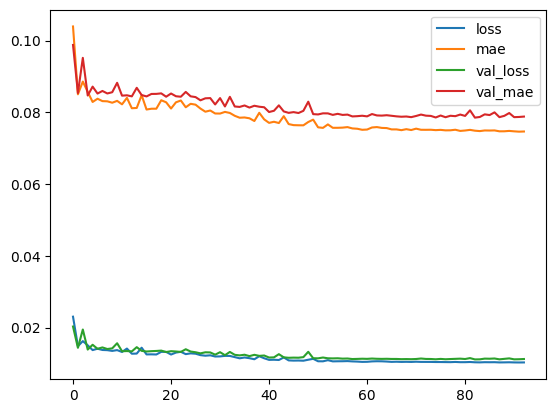

In [ ]:
pd.DataFrame(GRU_history.history).plot()

In [ ]:
# Make predictions
GRU_predict = GRU_model.predict(X_test)
GRU_predict

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


array([[0.33802098],
       [0.33605376],
       [0.3376416 ],
       [0.33689016],
       [0.33540612],
       [0.3403075 ],
       [0.3398591 ],
       [0.33272374],
       [0.33135065],
       [0.3305084 ],
       [0.33536923],
       [0.333124  ],
       [0.3302157 ],
       [0.34329394],
       [0.3400024 ],
       [0.34214383],
       [0.34578824],
       [0.34302247],
       [0.3173952 ],
       [0.21746135],
       [0.09094218],
       [0.0821266 ],
       [0.09915967],
       [0.09604821],
       [0.08827419],
       [0.08971816],
       [0.09452411],
       [0.08432236],
       [0.09945915],
       [0.10632966],
       [0.1065243 ],
       [0.10449753],
       [0.10732465],
       [0.09616074],
       [0.09726304],
       [0.09566077],
       [0.09585327],
       [0.09843965],
       [0.09698264],
       [0.09177791],
       [0.09812408],
       [0.10544698],
       [0.09984782],
       [0.10039698],
       [0.09791759],
       [0.08723   ],
       [0.08595902],
       [0.092

In [ ]:
inverted_GRU_predict = scaler.inverse_transform(GRU_predict)
y_true = scaler.inverse_transform(y_test)

print(f'inverted GRU predict:{inverted_GRU_predict[[0]]}')
print(f'y_true: {y_true[[0]]}')


inverted GRU predict:[[0.28708345]]
y_true: [[0.35]]


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_true, inverted_GRU_predict)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 0.010221431896384126
RMSE: 0.1011010974044502


In [ ]:
datetime_values = df.index[train_len + val_len + window_size: train_len + val_len + len(y_true) + window_size]

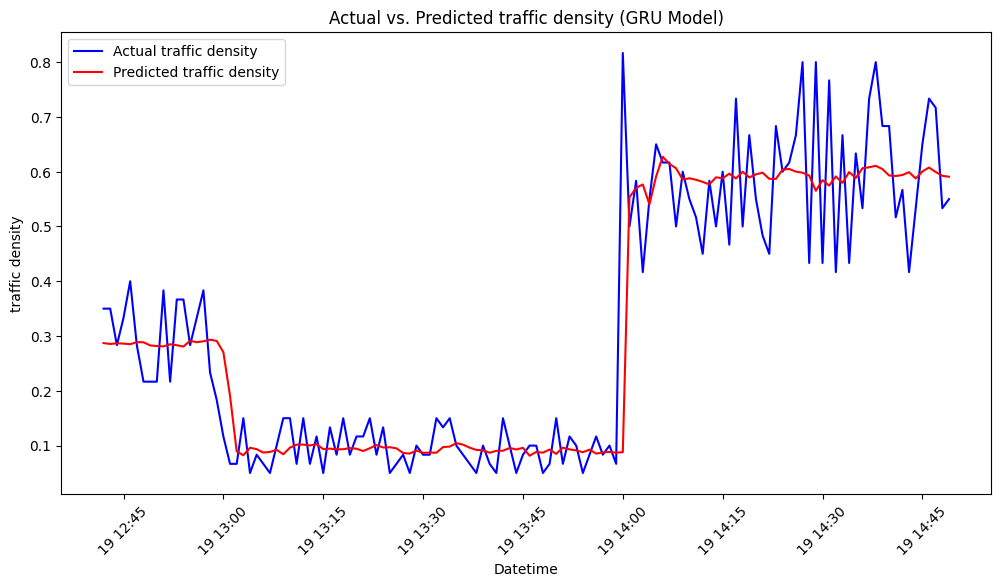

In [ ]:
# Plot the prediction (y_predict) Vs. (y_true)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(datetime_values, y_true, color='blue', label='Actual traffic density')
plt.plot(datetime_values, inverted_GRU_predict, color='red', label='Predicted traffic density')
plt.xticks(rotation=45)
plt.title('Actual vs. Predicted traffic density (GRU Model)')
plt.xlabel('Datetime')
plt.ylabel('traffic density')
plt.legend()
plt.show()

#### Saving the predictions in Json file

In [ ]:
# Saving the predictions into Json file

data_dict = {}

for dt, actual, predicted in zip(df.index, y_true.flatten(), inverted_GRU_predict.flatten()):

    data_dict[dt.strftime("%Y-%m-%d %H:%M:%S")] = {
        "actual_value": actual.item() if isinstance(actual, np.generic) else actual,
        "predicted_value": float(predicted),
        "road_name": "King Fahad Road"
    }

with open('gru_predictions_1.json', 'w') as f:
    json.dump(data_dict, f, indent=4)

In [ ]:
import keras
keras.saving.save_model(GRU_model, 'GRU_model2.keras')

In [ ]:
GRU_model.save('GRU_model.keras')


In [ ]:

# Save the model

GRU_model.save('GRU_model.h5')